In [1]:
# Step 1: Perform Exploratory Data Analysis (EDA)
import pandas as pd
df = pd.read_csv("ToyotaCorolla - MLR.csv")
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [2]:
# Summary statistics
summary = df.describe()
print(summary)

              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.0

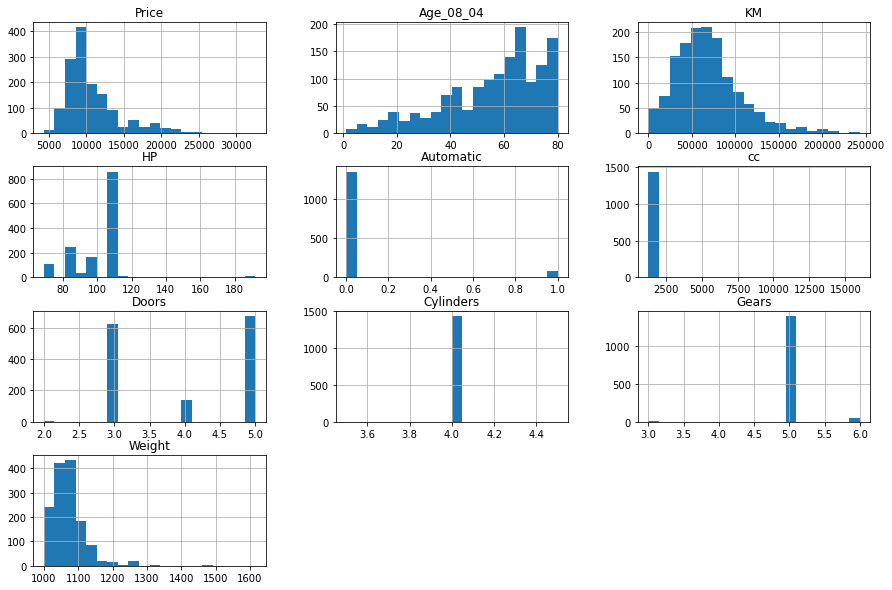

In [3]:
# Visualizations

import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
df.hist(bins=20, figsize=(15, 10))
plt.show()

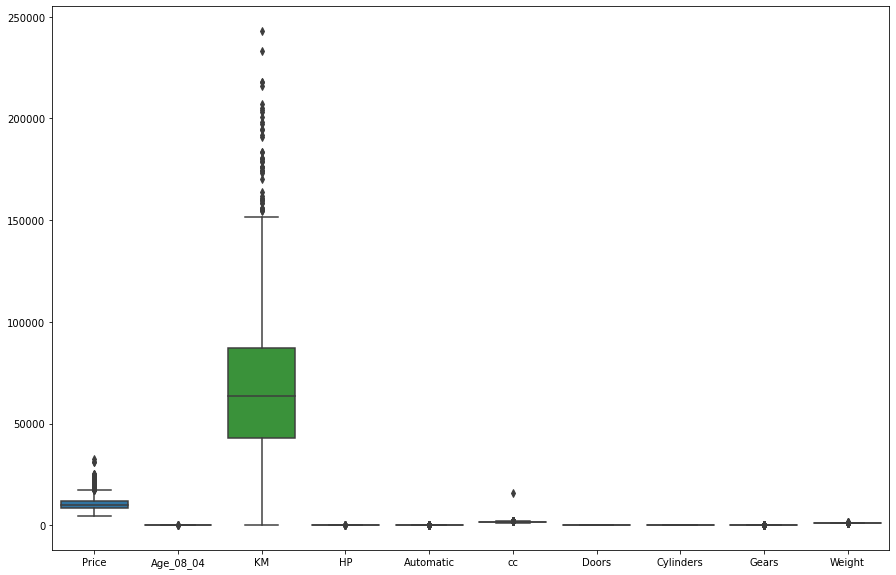

In [4]:
# Boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.show()

C:\Users\lokes\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lokes\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lokes\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lokes\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

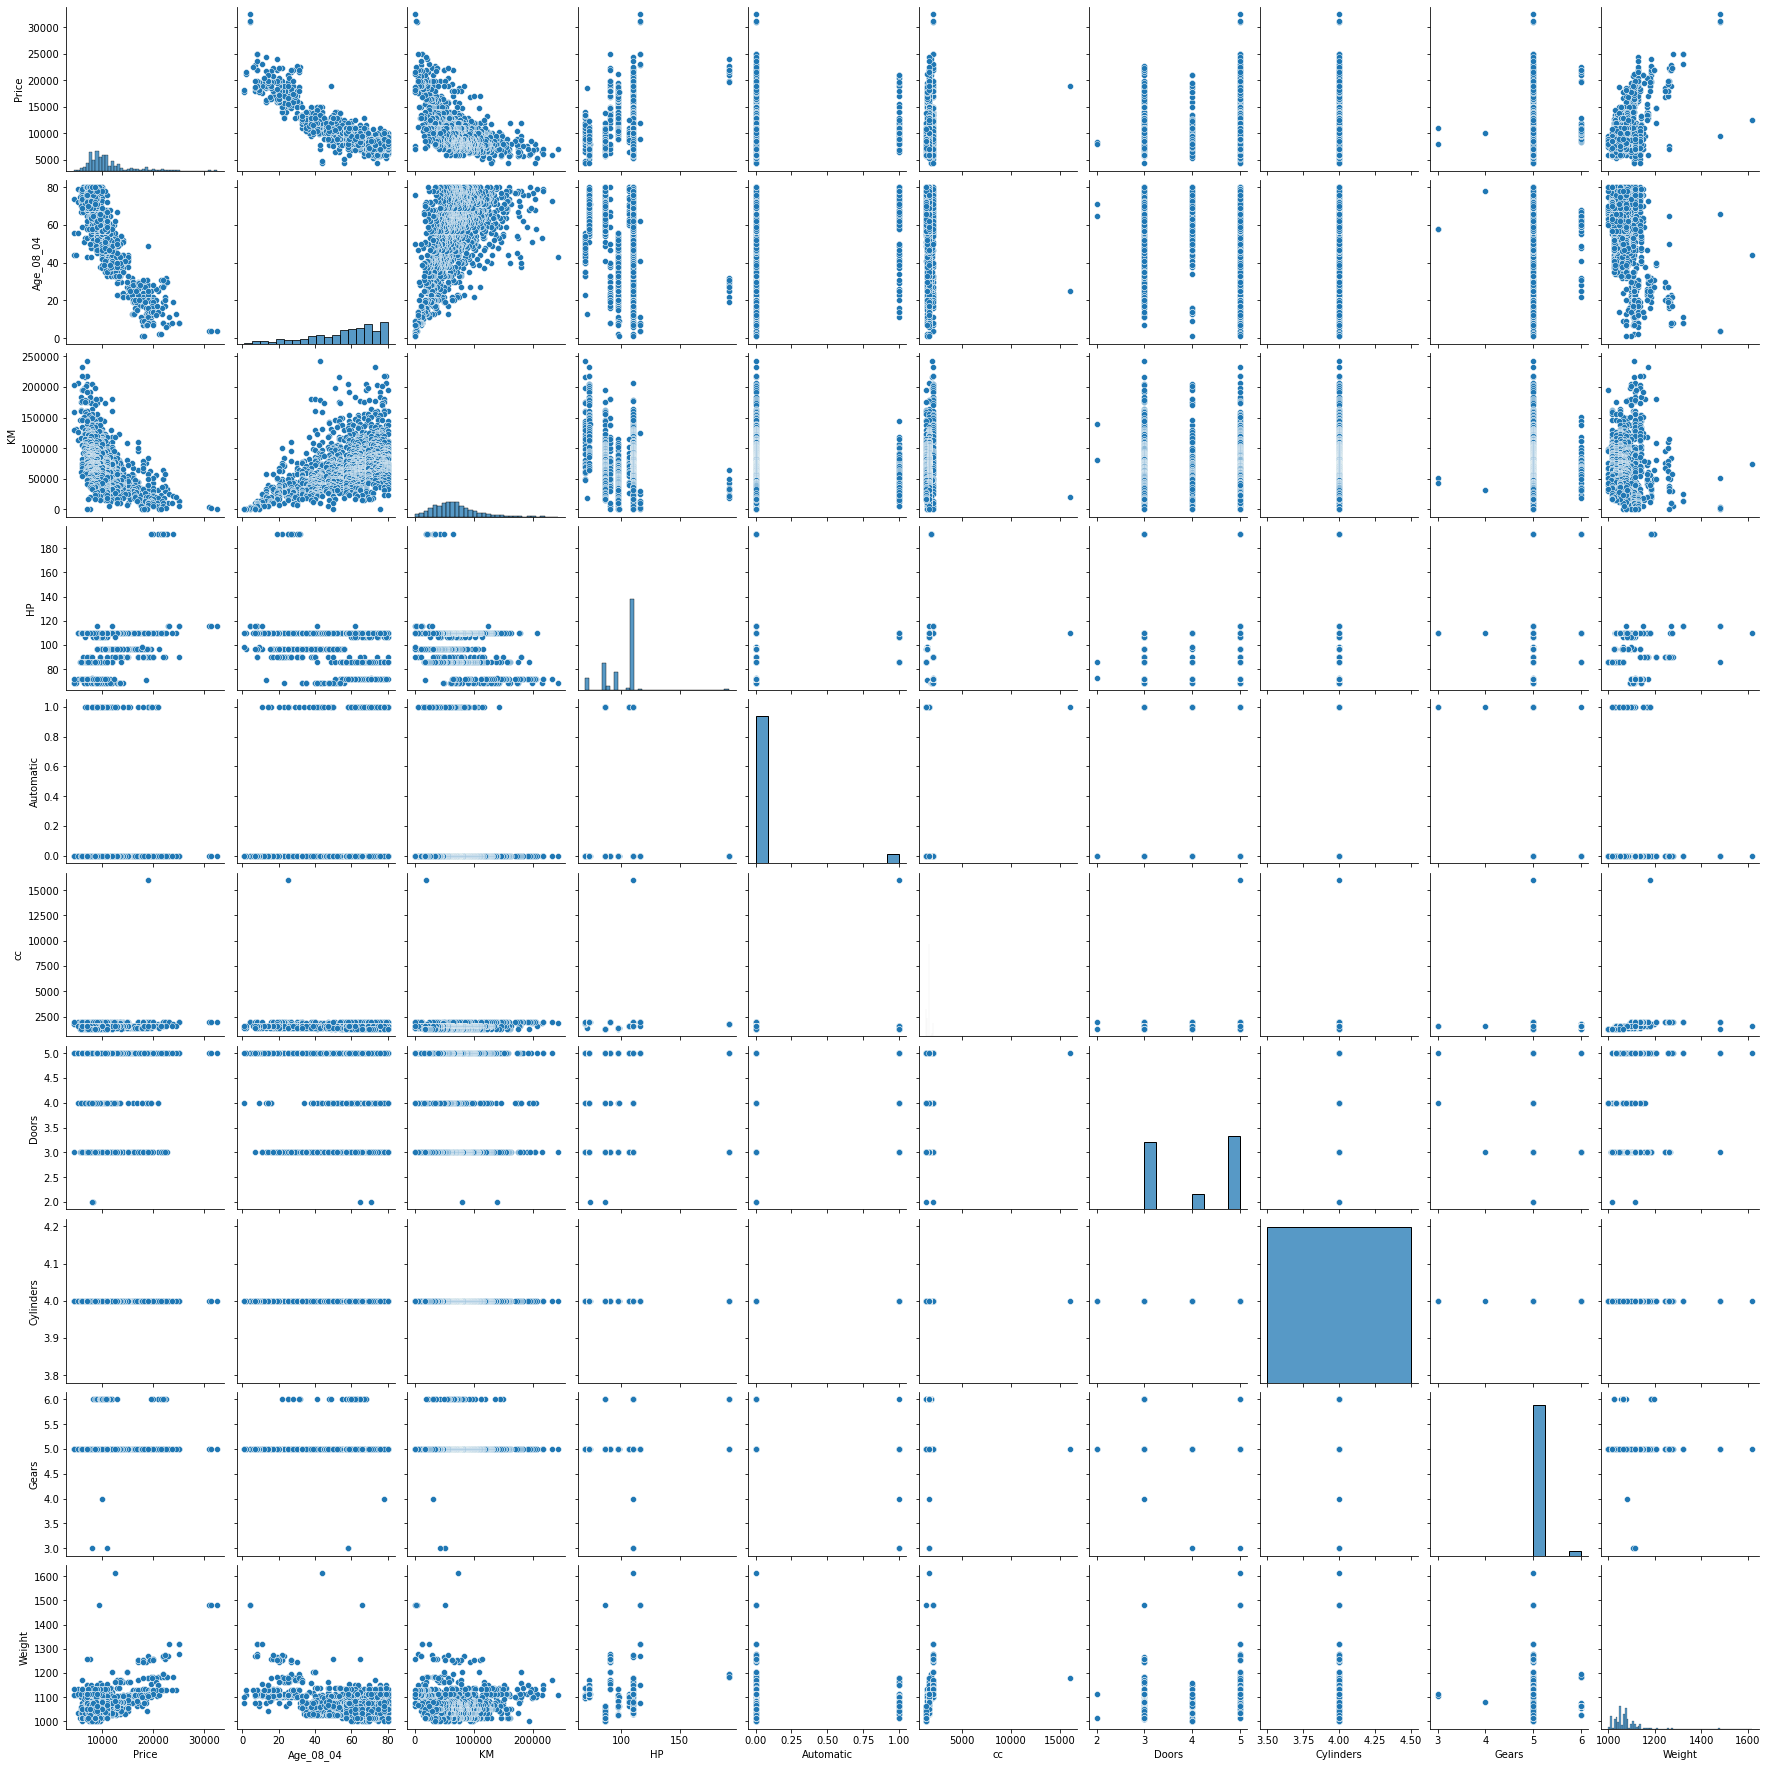

In [5]:
# Scatter plots
sns.pairplot(df)
plt.show()

Non-numeric columns: Index(['Fuel_Type'], dtype='object')


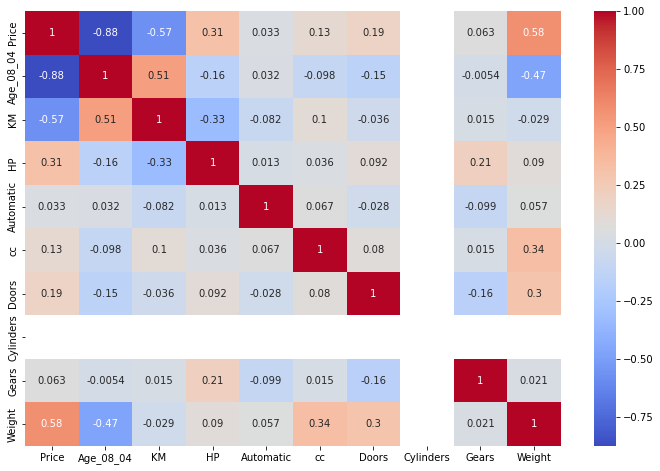

In [6]:
# Identify non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_cols)

# Handle non-numeric columns

df_numeric = df.drop(non_numeric_cols, axis=1)

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.show()

In [7]:
# Data Preprocessing

# Check for missing values
missing_values = df.isnull().sum()  # Use 'df' instead of 'df_processed'
print(missing_values)

# Normalize numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Update numerical_features to include one-hot encoded column names if applicable
numerical_features = ['KM', 'HP', 'Doors', 'Weight']

# Select only the numeric columns that exist in df
existing_numeric_features = [col for col in numerical_features if col in df.columns] # Use 'df' instead of 'df_processed'
df[existing_numeric_features] = scaler.fit_transform(df[existing_numeric_features]) # Use 'df' instead of 'df_processed')

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64


In [8]:
# Step 2: Split the Dataset

from sklearn.model_selection import train_test_split

# Assuming 'df' is your preprocessed DataFrame
X = df.drop('Price', axis=1)
y = df['Price']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X) # Add this line to handle categorical features

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train,X_test,y_train,y_test)

      Age_08_04        KM        HP  Automatic    cc     Doors  Cylinders  \
899          62 -0.246397 -1.035138          0  1300  1.014941          4   
881          68 -0.185773  0.567440          0  1600 -0.035099          4   
310          40 -0.796947  0.567440          0  1600  1.014941          4   
1145         75  0.888736  0.567440          0  1600  1.014941          4   
31           22 -0.889070 -0.300623          0  1400 -1.085139          4   
...         ...       ...       ...        ...   ...       ...        ...   
1095         76  1.526796  0.567440          0  1600 -1.085139          4   
1130         73  1.028841  0.567440          0  1600 -1.085139          4   
1294         80  0.085528  0.567440          0  1600  1.014941          4   
860          63 -0.102505 -1.035138          0  1300 -1.085139          4   
1126         80  1.105975  0.567440          0  1600 -0.035099          4   

      Gears    Weight  Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Petrol  


In [9]:
# Step 3: Build Multiple Linear Regression Models

# Model 1: Basic Linear Regression

from sklearn.linear_model import LinearRegression

# Model 1
model1 = LinearRegression()
model1.fit(X_train, y_train)

# Coefficients
print("Model 1 Coefficients:", model1.coef_)
print("Model 1 Intercept:", model1.intercept_)


Model 1 Coefficients: [-1.20830458e+02 -6.08570564e+02  2.10253304e+02  1.48830927e+02
 -3.03721946e-02 -5.74368449e+01  1.13686838e-13  5.51600710e+02
  1.36213868e+03 -4.34086718e+02 -5.02635474e+02  9.36722192e+02]
Model 1 Intercept: 14008.658105047314


In [10]:
# Model 2: Linear Regression with Polynomial Features

from sklearn.preprocessing import PolynomialFeatures

# Polynomial Features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Model 2
model2 = LinearRegression()
model2.fit(X_train_poly, y_train)

# Coefficients
print("Model 2 Coefficients:", model2.coef_)
print("Model 2 Intercept:", model2.intercept_)


Model 2 Coefficients: [-1.10841692e-03 -5.19698361e+01 -8.71855318e+01 -2.41026650e+03
 -2.87324625e+02  1.22716259e+01 -1.52253464e+03 -3.23807463e-07
  1.85570317e+03  4.30360999e+03 -2.66377963e+04  6.45707586e+03
  2.01807204e+04  9.84832531e-03  1.47542471e+01  8.71557519e+00
  1.00508853e+01 -9.58876543e-02  1.24135790e+01 -2.07876352e+02
  1.95789449e+02 -4.30102077e+01 -2.01665020e+01  3.54736533e+01
 -6.72762392e+01 -1.22512295e+02 -1.32108292e+02 -9.04740830e+01
  6.79186754e-02 -1.23001787e+02 -3.48742126e+02 -6.64917484e+01
  4.11144216e+02 -4.33135803e+02 -1.60106657e+02  5.06056928e+02
  1.11799780e+02 -3.13016633e+03 -9.60149239e-01 -1.73114258e+02
 -9.64106600e+03  7.16402689e+03  6.90473314e+01 -1.51153644e+04
  6.94606784e+03  5.75903003e+03 -2.87324625e+02  1.48078167e+01
 -2.86536115e+02 -1.14929850e+03 -5.70633162e+03 -2.53794721e+02
 -1.10720018e+04  4.59948524e-10  1.07846772e+04 -1.50029364e-03
 -3.40227031e-01  4.90865009e+01 -4.00606930e+00  1.11984575e+00
  3

In [11]:
# Model 3: Linear Regression with Interaction Terms

# Adding interaction terms manually
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(interaction_only=True, include_bias=False)
X_train_inter = poly.fit_transform(X_train)
X_test_inter = poly.transform(X_test)

# Model 3
model3 = LinearRegression()
model3.fit(X_train_inter, y_train)

# Coefficients
print("Model 3 Coefficients:", model3.coef_)
print("Model 3 Intercept:", model3.intercept_)


Model 3 Coefficients: [-4.17145452e+01 -4.18722026e+01 -1.20822682e+03  9.67291994e+02
  1.32896538e+01 -8.53283372e+02  2.84409372e-08  9.55340272e+02
  1.14265927e+03 -3.11591952e+04  7.18911518e+03  2.39700800e+04
  1.04381391e+01  9.52064608e+00  2.84109497e+01 -8.08600231e-02
  1.28270429e+01 -1.66858181e+02  1.56847454e+02 -4.78517193e+01
 -1.11963396e+01  4.01772166e+01 -7.06954220e+01 -9.40216558e+01
 -3.06664439e+01 -2.89566411e-01 -1.41484936e+02 -1.67488810e+02
 -1.13814519e+02  4.82459159e+02 -6.09082918e+02 -1.72060945e+02
  7.39271660e+02  8.58286420e+02  3.06111748e-01 -1.47743706e+02
 -4.83290728e+03  2.23255060e+03  1.79284926e+02 -1.76809892e+04
  8.21537337e+03  8.25738898e+03 -5.49438838e+00 -3.17507878e+02
  3.86916798e+03 -3.44176469e+03  7.00893206e+01 -6.34969179e+03
 -2.06000550e-10  7.31698378e+03 -3.37114589e-01  5.31586166e+01
 -4.43009291e+00  2.89932183e-01  4.00443159e+02 -1.90085724e+02
 -1.97067788e+02 -3.41313349e+03  2.91518759e+03  2.78126349e+02
 -2

In [12]:
# Step 4: Evaluate Model Performance

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Model Evaluation Function
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mae, mse, r2

# Evaluate Model 1
mae1, mse1, r21 = evaluate_model(model1, X_test, y_test)
print(f"Model 1 - MAE: {mae1}, MSE: {mse1}, R2: {r21}")

# Evaluate Model 2
mae2, mse2, r22 = evaluate_model(model2, X_test_poly, y_test)
print(f"Model 2 - MAE: {mae2}, MSE: {mse2}, R2: {r22}")

# Evaluate Model 3
mae3, mse3, r23 = evaluate_model(model3, X_test_inter, y_test)
print(f"Model 3 - MAE: {mae3}, MSE: {mse3}, R2: {r23}")


Model 1 - MAE: 990.8872739193947, MSE: 2203043.823143697, R2: 0.8348888040611087
Model 2 - MAE: 908.7901871451099, MSE: 3198379.342746369, R2: 0.7602915417299654
Model 3 - MAE: 888.3840830985799, MSE: 2935157.2136885426, R2: 0.780019211270511


In [13]:
# Step 5: Apply Lasso and Ridge Methods

#Lasso Regression

from sklearn.linear_model import Lasso

# Lasso Model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Evaluate Lasso Model
mae_lasso, mse_lasso, r2_lasso = evaluate_model(lasso, X_test, y_test)
print(f"Lasso - MAE: {mae_lasso}, MSE: {mse_lasso}, R2: {r2_lasso}")


Lasso - MAE: 990.8828605700946, MSE: 2202806.8540987126, R2: 0.8349065641446834


In [14]:
# Ridge Regression

from sklearn.linear_model import Ridge

# Ridge Model
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

# Evaluate Ridge Model
mae_ridge, mse_ridge, r2_ridge = evaluate_model(ridge, X_test, y_test)
print(f"Ridge - MAE: {mae_ridge}, MSE: {mse_ridge}, R2: {r2_ridge}")


Ridge - MAE: 990.893488677624, MSE: 2202218.0104949833, R2: 0.8349506961181881
